In [210]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')
df.head(10)
# pclass = passenger class (1,2,3)
# sib / sp = sibling / spouse aboard
# par/ch = parent/ child abord
# fare = passenger fair
# embarked = port for embarkation c,q,s
# boat = life boat if survived

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [211]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

# Clean Age Col

In [212]:
# df.isnull().sum()
df['age'].fillna(df.age.mean(), inplace=True)
df[df.age.isnull()] # Have not null value anymore.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [213]:
q1, q3 = np.percentile(df.age, [25, 75])
iqr = q3 - q1 
print("Q1: {}".format(q1))
print(f'Q2: {q3}')
print(f'IQR: {iqr}')

lower = q1 - 1.5* iqr
upper = q3 + 1.5 * iqr

Q1: 22.0
Q2: 35.0
IQR: 13.0


In [214]:
df[df.age > q3].age.count()

217

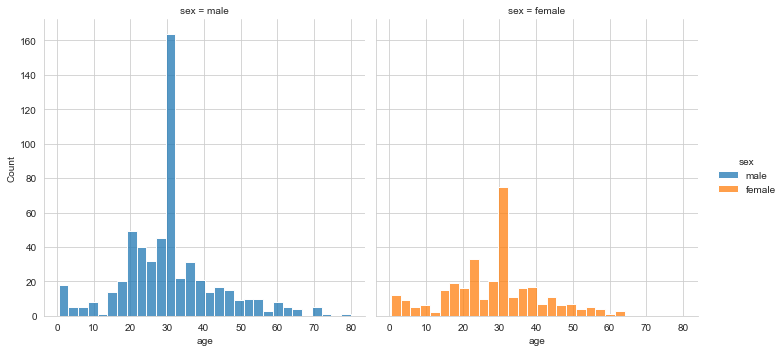

In [215]:
sns.displot(x=df.age, col=df.sex, hue=df.sex, kind='hist')

Text(54.5, 0.3, 'Upper bound 54.500000\n')

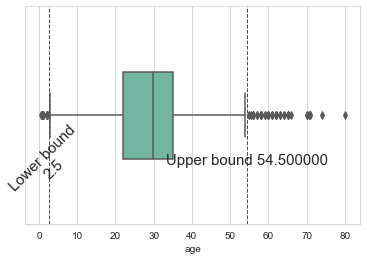

In [216]:
sns.boxplot(x=df.age, width=0.4, palette='Set2')
# outlier
plt.axvline(x=lower, linestyle='--', linewidth=1, c='r')
plt.axvline(x=upper, linestyle='--', linewidth=1, c='r')

plt.annotate(text=f'Lower bound\n{lower}',
             xy=(lower, 0.4), ha='center', fontsize=15,
            rotation=45)
plt.annotate(text='Upper bound %f\n' %upper,
             xy=(upper, 0.3), ha='center', fontsize=15)

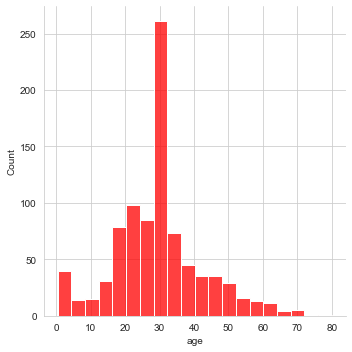

In [217]:
sns.set_style('whitegrid')
sns.displot(x=df.age, bins=20, color='r')

# Suppose we eliminate Age outlier ( even it's should not )
### ( we should preserve all people data)

In [218]:
df.age.notnull().count()

891

In [219]:
df[df.age < lower].age.count()

24

In [220]:
df[df.age > upper].age.count()

42

In [221]:
# eliminate
# print(upper)
# df[df.age > upper]
# df2 = df.drop(df[(df.age > upper ) | ([df.age < lower])].index )
outlier_df =  df[(df.age > upper) | (df.age < lower)]
outlier_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.00,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
11,1,1,female,58.00,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
15,1,2,female,55.00,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True
16,0,3,male,2.00,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
33,0,2,male,66.00,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,1,2,male,1.00,0,2,37.0042,C,Second,child,False,NaN,Cherbourg,yes,False
829,1,1,female,62.00,0,0,80.0000,NaN,First,woman,False,B,NaN,yes,True
831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,NaN,Southampton,yes,False
851,0,3,male,74.00,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='age'>

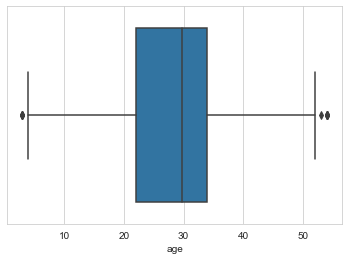

In [222]:
# labels of drop() = index
df_no_outl = df.drop(df[ (df.age > upper ) | (df.age < lower)].index )
# df2.shape[0] # outliers eliminated.
sns.boxplot(x=df_no_outl.age)

In [223]:
df_no_outl.age.describe().round(2)

count    825.00
mean      28.88
std       10.18
min        3.00
25%       22.00
50%       29.70
75%       34.00
max       54.00
Name: age, dtype: float64

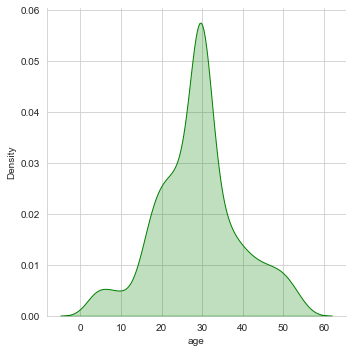

In [224]:
sns.displot(x=df_no_outl.age, kind='kde', color='g', 
           palette='husl', fill=True)

# Manully calculate Z-Score

In [225]:
import numpy as np

lst = np.random.randn(10) * 20 + 170 # 170 +- 20, (150 -> 190) # height
mean = np.mean(lst)
std = np.std(lst, ddof=0)
print(f"mean : {mean}")
print(f'std : {std}')

def z_score(x, m, s):
    return (x - m ) / s
print('================\r\r',)
for i in lst:
    z = z_score(i, m=mean, s=std)
    print(z)
all_z = [ z_score(i, mean, std) for i in lst]

mean : 178.81956270835698
std : 15.482850458796198
-1.6774424850666187
0.7600420475448274
-0.08792507982235132
-1.0681699066878325
0.7685198973780097
0.2930480906382479
0.2779966484907118
1.7821249420241745
-1.2243463441644649
0.17615218966529242


<AxesSubplot:ylabel='Density'>

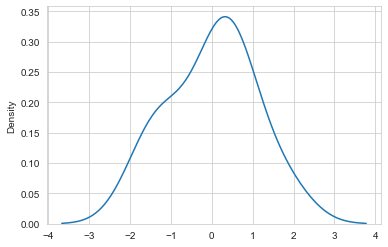

In [226]:
all_z
sns.kdeplot(x=all_z)

## if z < -2.5 or z > +2.5 it's outlier

In [227]:
from scipy.stats import zscore
zsc = zscore(lst, ddof=0)
zsc


array([-1.67744249,  0.76004205, -0.08792508, -1.06816991,  0.7685199 ,
        0.29304809,  0.27799665,  1.78212494, -1.22434634,  0.17615219])

In [228]:
df['age-z'] = zscore(df.age, ddof=0)
df[['age', 'age-z']]

,age,age-z
0,22.000000,-0.592481
1,38.000000,0.638789
2,26.000000,-0.284663
3,35.000000,0.407926
4,35.000000,0.407926
...,...,...
886,27.000000,-0.207709
887,19.000000,-0.823344
888,29.699118,0.000000
889,26.000000,-0.284663


<AxesSubplot:xlabel='age-z', ylabel='Density'>

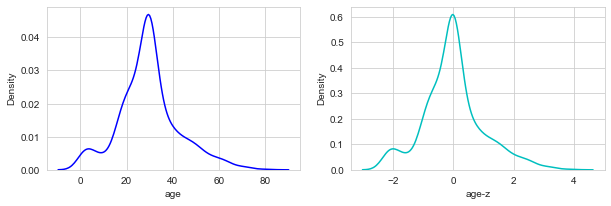

In [229]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.kdeplot(x=df.age, ax=axes[0], color='b')
sns.kdeplot(x=df['age-z'], ax=axes[1], color='c')

In [230]:
threshold = 2.5
# df['outlier_age'] = df['age-z'].apply(lambda x :
#                     x <= -threshold or x >= threshold)
df['outlier_age'] = df['age-z'].apply(lambda x :
                    ( np.abs(x) >= threshold ))
df[['age', 'outlier_age']]


,age,outlier_age
0,22.000000,False
1,38.000000,False
2,26.000000,False
3,35.000000,False
4,35.000000,False
...,...,...
886,27.000000,False
887,19.000000,False
888,29.699118,False
889,26.000000,False


In [231]:
df[df.outlier_age == True ].outlier_age.count()

15

In [232]:
df[df.outlier_age == True].outlier_age

33     True
54     True
96     True
116    True
275    True
280    True
438    True
456    True
483    True
493    True
545    True
630    True
672    True
745    True
851    True
Name: outlier_age, dtype: bool

In [233]:
df_no_outl_z = df[df.outlier_age == False]
print('new mean : %.2f' % (df_no_outl_z.age.mean()))
df_no_outl_z.head()


new mean2 : 29.04


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age-z,outlier_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,-0.592481,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.638789,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,-0.284663,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.407926,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.407926,False


# Use Np to automatically eliminate Outliers

In [242]:
df_no_outl_z2 = df[np.abs(df['age-z']) <= threshold]
print(f'new mean : {df_no_outl_z2.age.mean().round(2)}')
df_no_outl_z2.drop(columns=['outlier_age', 'age-z'], inplace=True)
df_no_outl_z2.head()

new mean : 29.04


/home/liberio/miniconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


old mean : 29.70
new mean : 29.04


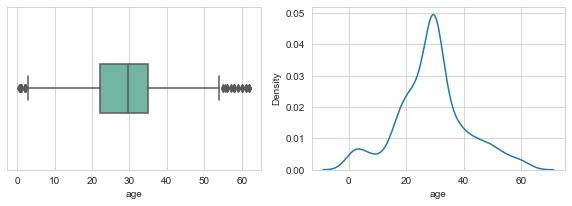

In [254]:
print('old mean : %.2f' % (df.age.mean()))
print('new mean : %.2f' % (df_no_outl_z2.age.mean()))
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
sns.boxplot(x=df_no_outl_z2.age, width=0.3, palette='Set2',
           ax=axs[0])
sns.kdeplot(x=df_no_outl_z2.age, palette='Set3', 
           ax=axs[1])
plt.show()